In [4]:
import numpy as np

from src.utils import build_knn_graph
from src.characteristics import \
    calculate_triangles, \
    calculate_chromatic_number

import matplotlib.pyplot as plt

from tqdm import tqdm

## 1. Исследовать, как ведет себя числовая характеристика $\tau$ в зависимости от параметров распределений $\theta$ и $\nu$, зафиксировав размер выборки и параметр процедуры построения графа.


### 1.1. Исследуем характеристику $\tau^{KNN}$.

Зафиксируем размер выборки $n = 100$ и количество соседей $k = 5$. Число итераций для метода Монте-Карло равно 1000.

#### 1.1.1. Распределение LogNormal с $\mu$ = 0 и параметром $\theta$.

In [5]:
thetas = [0.001, 0.01, 0.1, 1, 2, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100]
n_samples = 50
k_neighbours = 5
n_iter = 1000

100%|██████████| 15/15 [02:01<00:00,  8.10s/it]


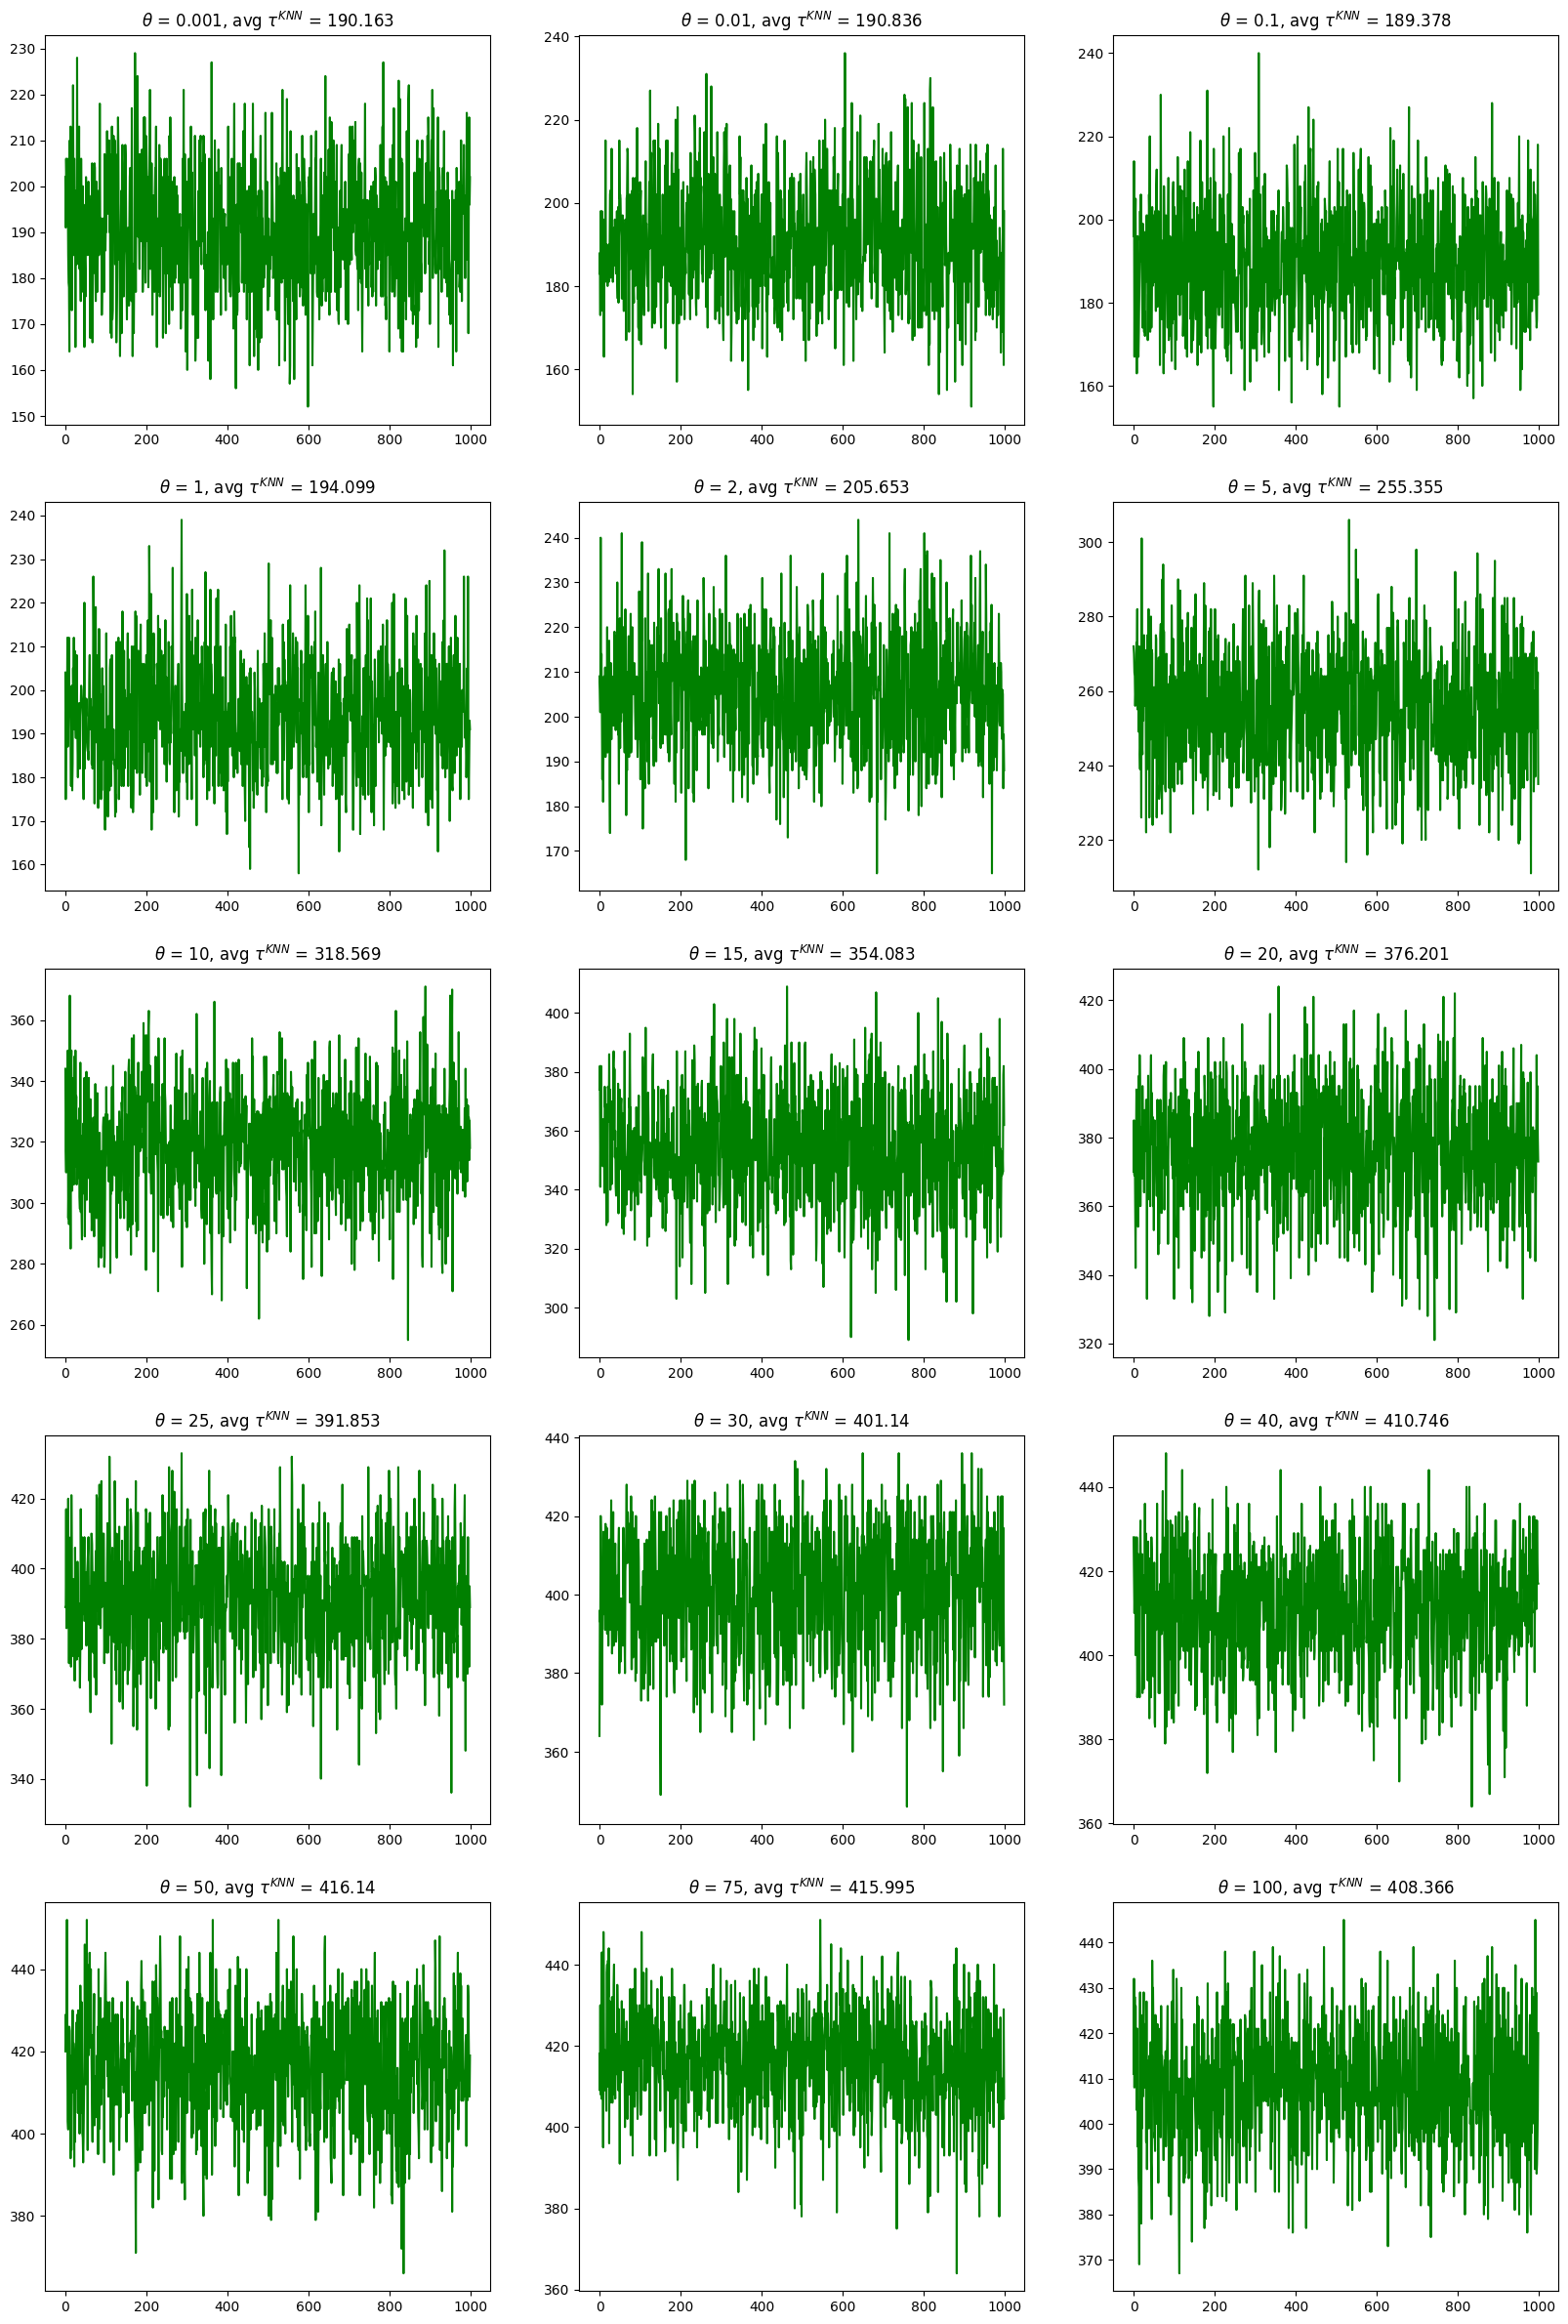

In [6]:
figure, axis = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, theta in enumerate(tqdm(thetas)):
    n_triangles = []
    for _ in range(n_iter):
        vertices = np.random.lognormal(0, theta, n_samples)
        knn_graph = build_knn_graph(vertices, k_neighbours)
        n_triangles.append(calculate_triangles(knn_graph))
    
    axis[i // 3][i % 3].plot(n_triangles, color="green")
    axis[i // 3][i % 3].set_title(f"$\\theta$ = {theta}, avg $\\tau^{{KNN}}$ = {sum(n_triangles) / n_iter}")

plt.show();

Заметим, что с увеличением $\theta$ усредненная характеристика $\tau^{KNN}$ принимает значения от 189 и выше, а на $\theta \in [0, 1]$ ее значение немного отклоняется от 189.

#### 1.1.2. Распределение Exp с параметром $\nu$.

In [7]:
nus = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 15, 20, 25, 30, 50, 75, 100]
n_samples = 50
k_neighbours = 5
n_iter = 1000

100%|██████████| 15/15 [02:03<00:00,  8.24s/it]


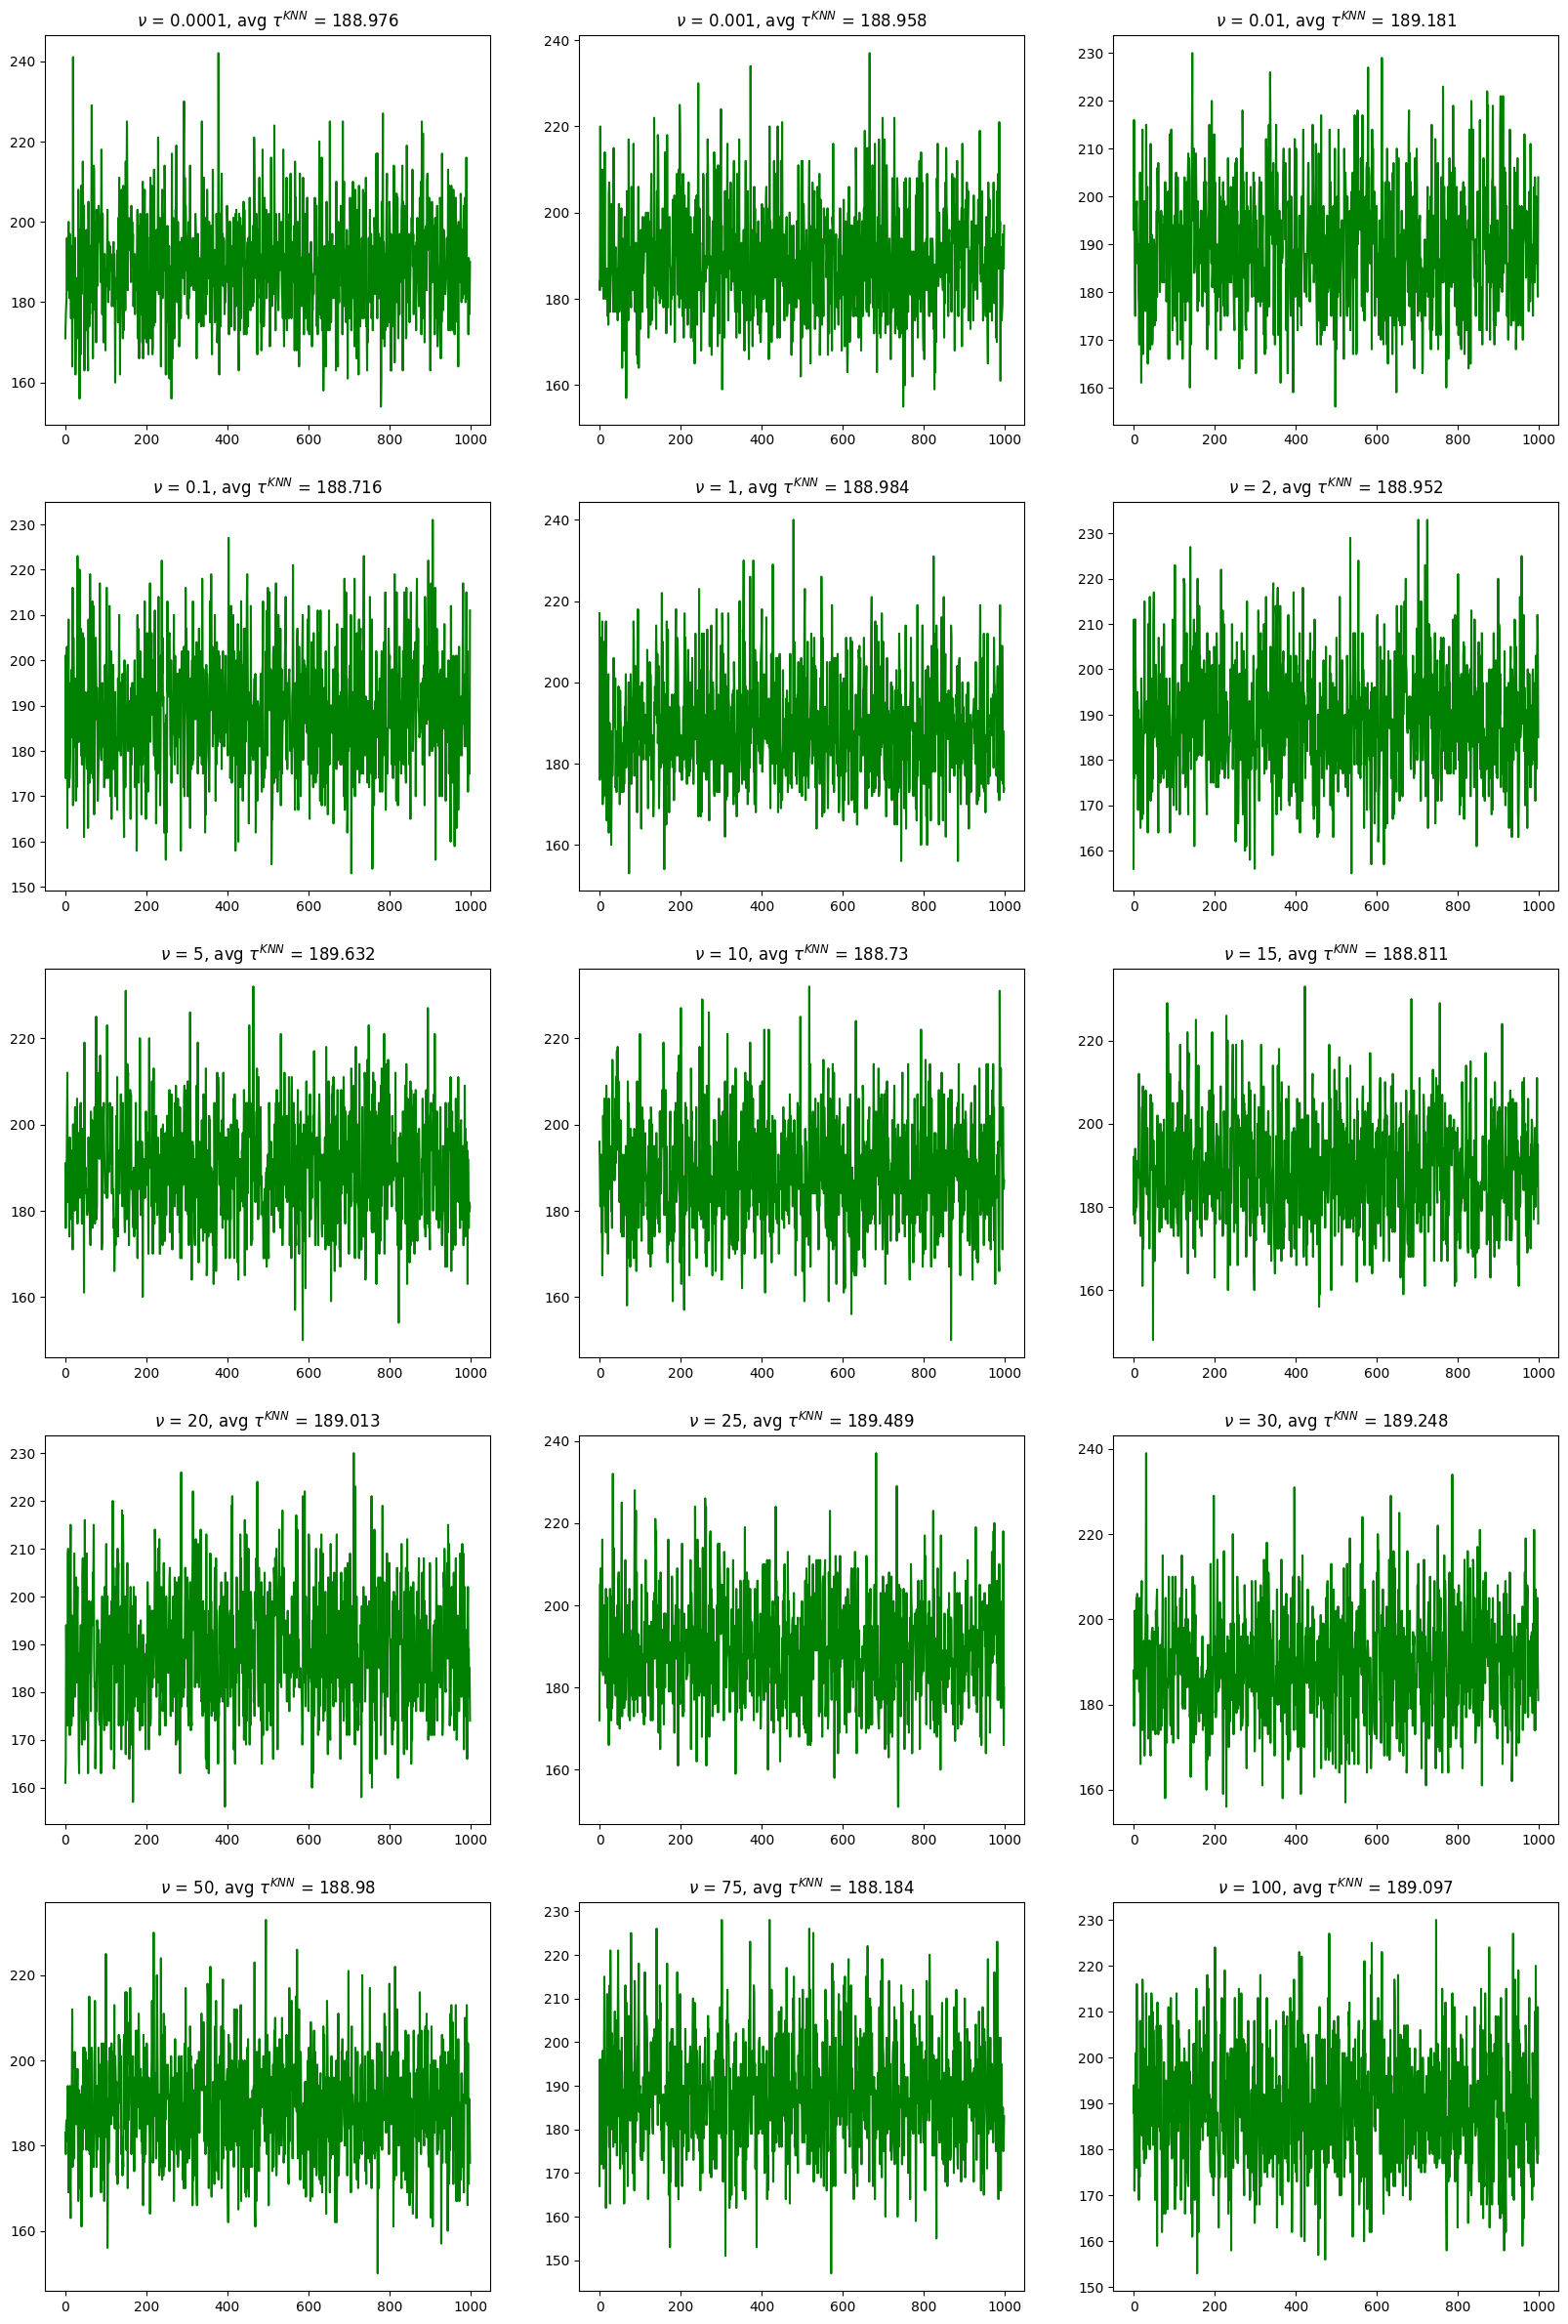

In [8]:
figure, axis = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, nu in enumerate(tqdm(nus)):
    n_triangles = []
    for _ in range(n_iter):
        vertices = np.random.exponential(nu, n_samples)
        knn_graph = build_knn_graph(vertices, k_neighbours)
        n_triangles.append(calculate_triangles(knn_graph))
    
    axis[i // 3][i % 3].plot(n_triangles, color="green")
    axis[i // 3][i % 3].set_title(f"$\\nu$ = {nu}, avg $\\tau^{{KNN}}$ = {sum(n_triangles) / n_iter}")

plt.show();

В случае экспоненциального распределения усредненная характеристика $\tau^{KNN}$ принимает значения в некоторой окрестности 188 независимо от значения $\nu$.

### 1.2. Исследуем характеристику $\tau^{dist}$.

Зафиксируем размер выборки $n = 100$ и расстояние $dist = 5$.

#### 1.2.1. Распределение LogNormal с $\mu$ = 0 и параметром $\theta$.

In [9]:
thetas = [1, 2, 5, 10, 15, 20, 25, 30, 50, 75, 100, 150, 200, 250, 500]
n_samples = 50
dist = 5
n_iter = 1000

100%|██████████| 15/15 [00:01<00:00, 10.39it/s]


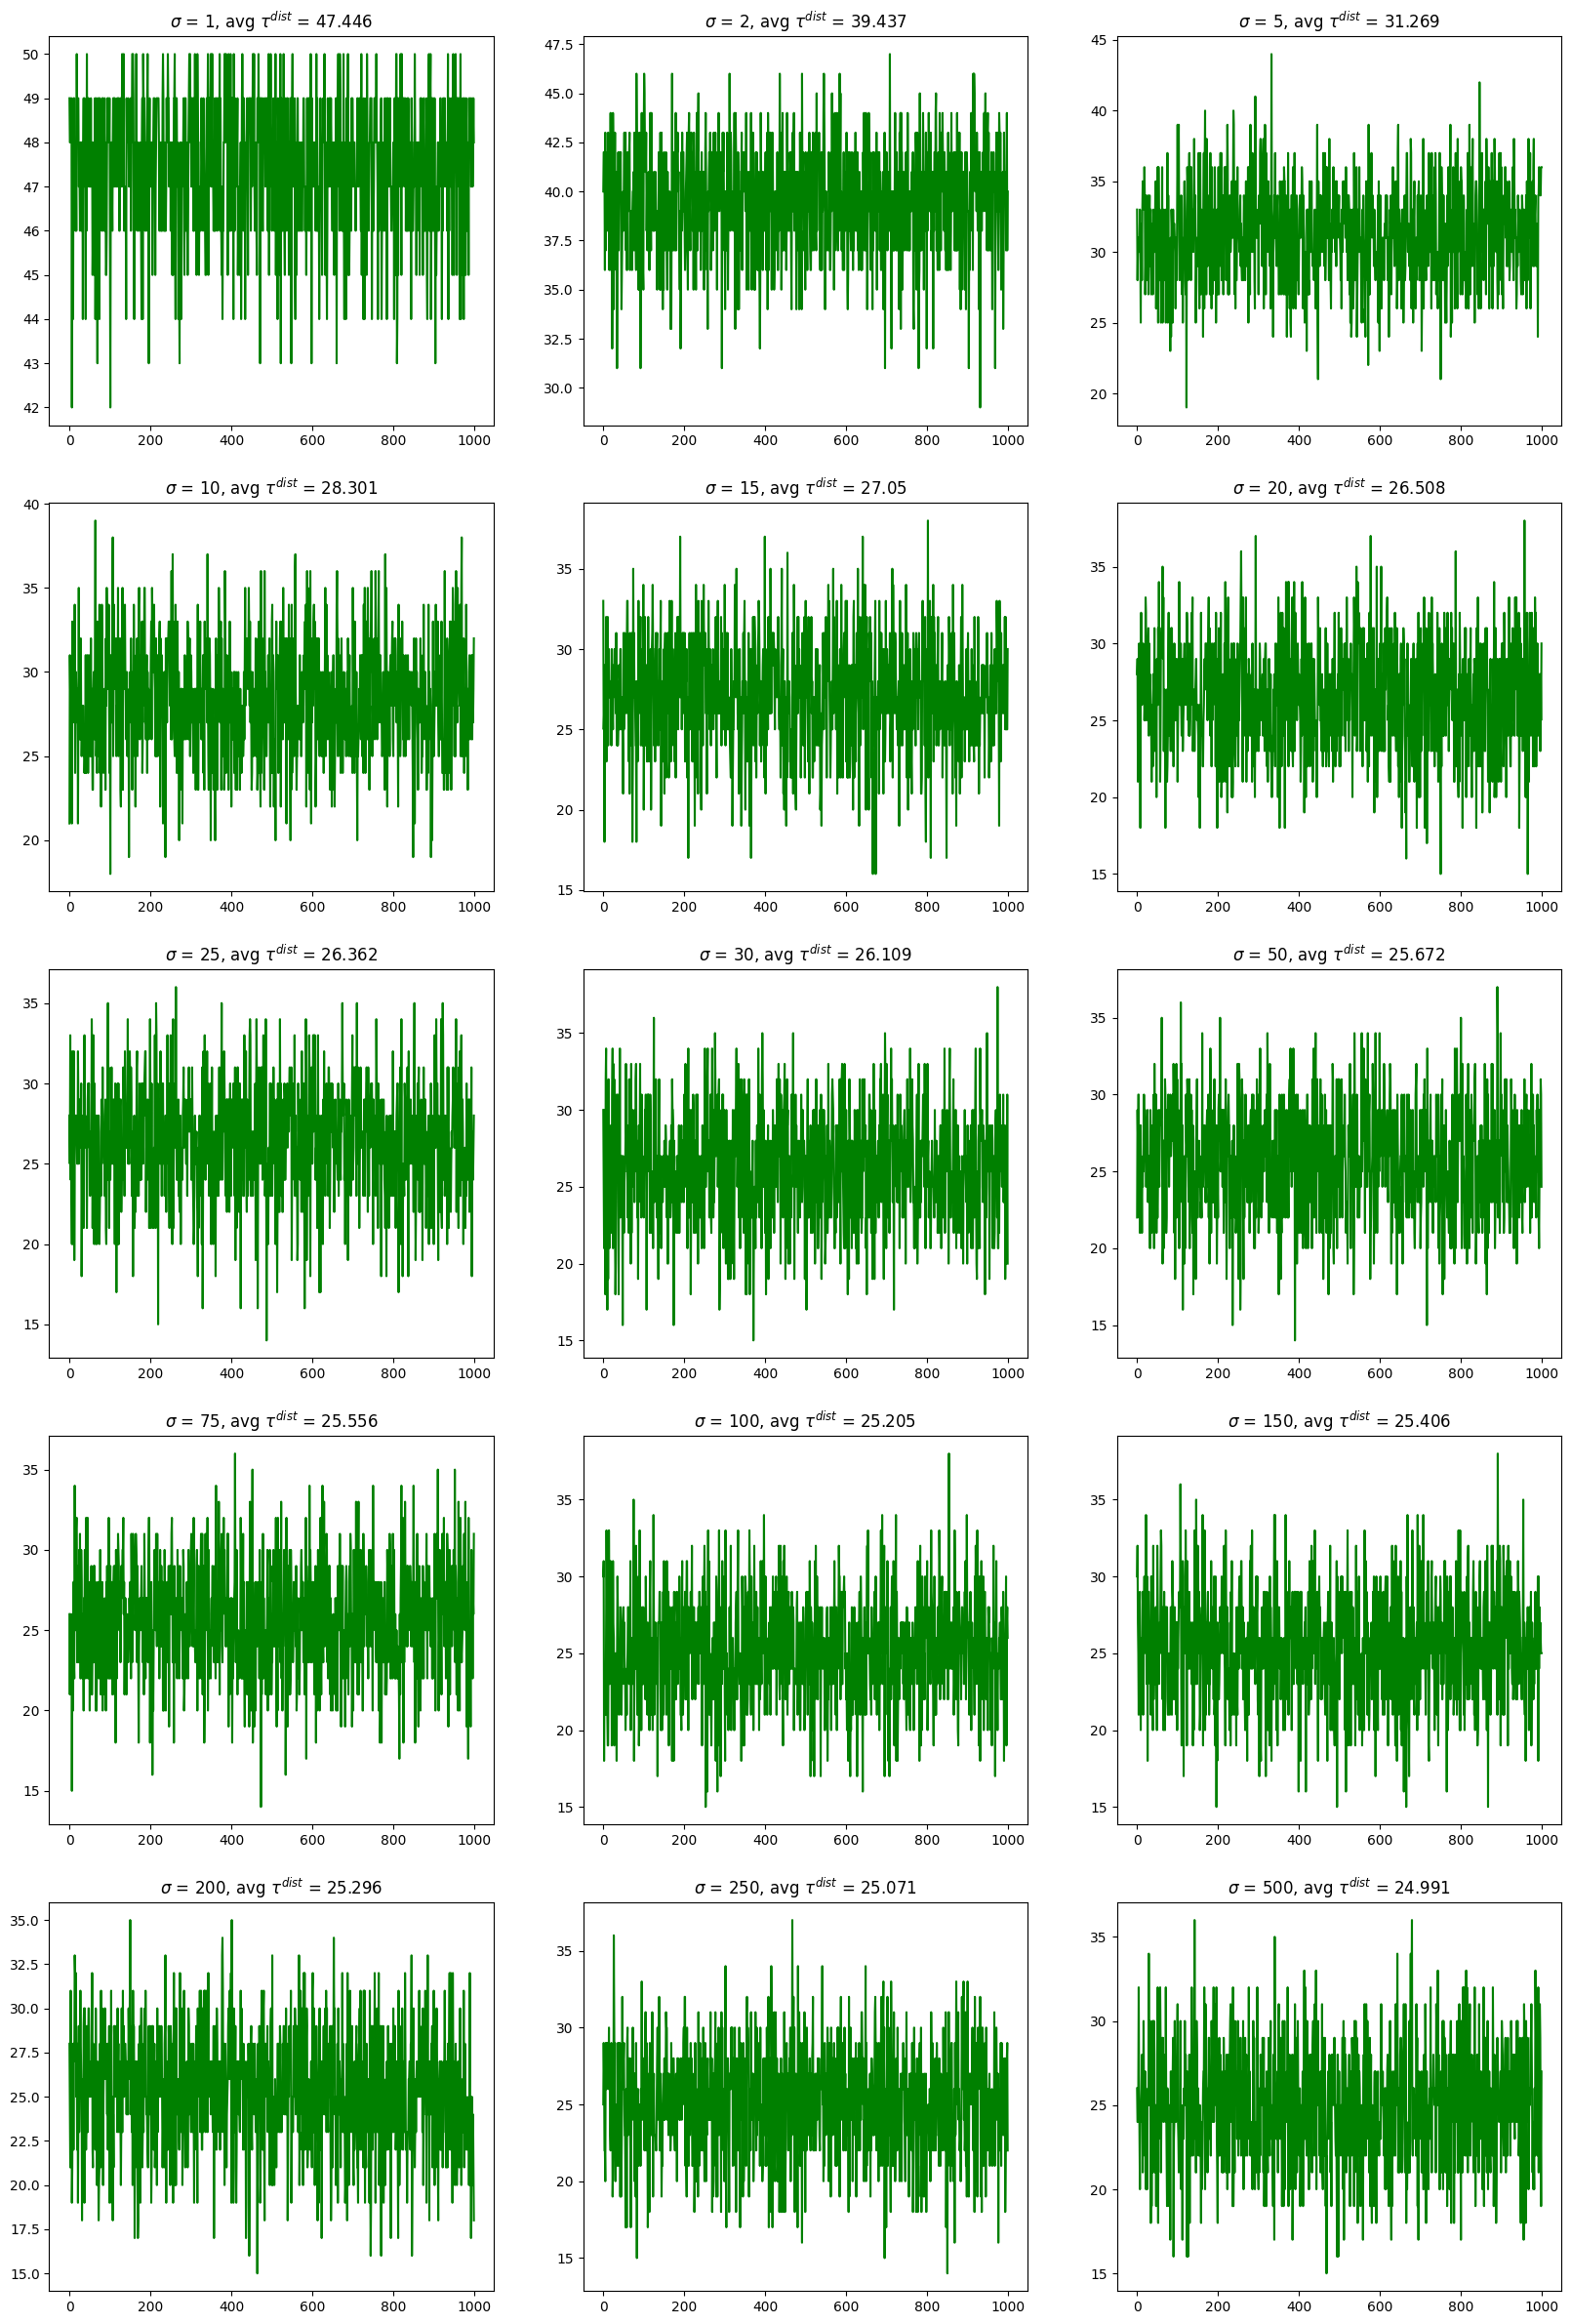

In [ ]:
figure, axis = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, theta in enumerate(tqdm(thetas)):
    chromatic_number = []
    for _ in range(n_iter):
        vertices = np.random.lognormal(0, theta, n_samples)
        chromatic_number.append(calculate_chromatic_number(vertices, dist))
    
    axis[i // 3][i % 3].plot(chromatic_number, color="green")
    axis[i // 3][i % 3].set_title(f"$\\theta$ = {theta}, avg $\\tau^{{dist}}$ = {sum(chromatic_number) / n_iter}")

plt.show();

#### 1.2.2. Распределение Exp с переменной $\nu$.

In [10]:
nus = [1, 2, 5, 10, 15, 20, 25, 30, 50, 75, 100, 150, 200, 250, 500]
n_samples = 50
dist = 5
n_iter = 1000

In [ ]:
figure, axis = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, nu in enumerate(tqdm(nus)):
    chromatic_number = []
    for _ in range(n_iter):
        vertices = np.random.exponential(nu, n_samples)
        chromatic_number.append(calculate_chromatic_number(vertices, dist))
    
    axis[i // 3][i % 3].plot(chromatic_number, color="green")
    axis[i // 3][i % 3].set_title(f"$\\nu$ = {nu}, avg $\\tau^{{dist}}$ = {sum(chromatic_number) / n_iter}")

plt.show();

NameError: name 'plt' is not defined

## 2. Исследовать, как ведет себя числовая характеристика $\Tau$ в зависимости от параметров процедуры построения графа и размера выборки при фиксированных значениях $\theta = 1$ и $\nu = \frac{1}{\sqrt{e^2 - e}}$.


### 2.1. Исследуем характеристику $\Tau^{KNN}$.

#### 2.1.1. Распределение LogNormal с $\mu$ = 0 и $\theta = 1$.

In [2]:
n_samples = [1, 2, 5, 10, 15, 20, 25, 50, 100, 150, 200, 500]
k_neighbours = [1, 2, 3, 5, 10, 15]
n_iter = 1000

 75%|███████▌  | 9/12 [11:50<03:56, 78.99s/it] 


KeyboardInterrupt: 

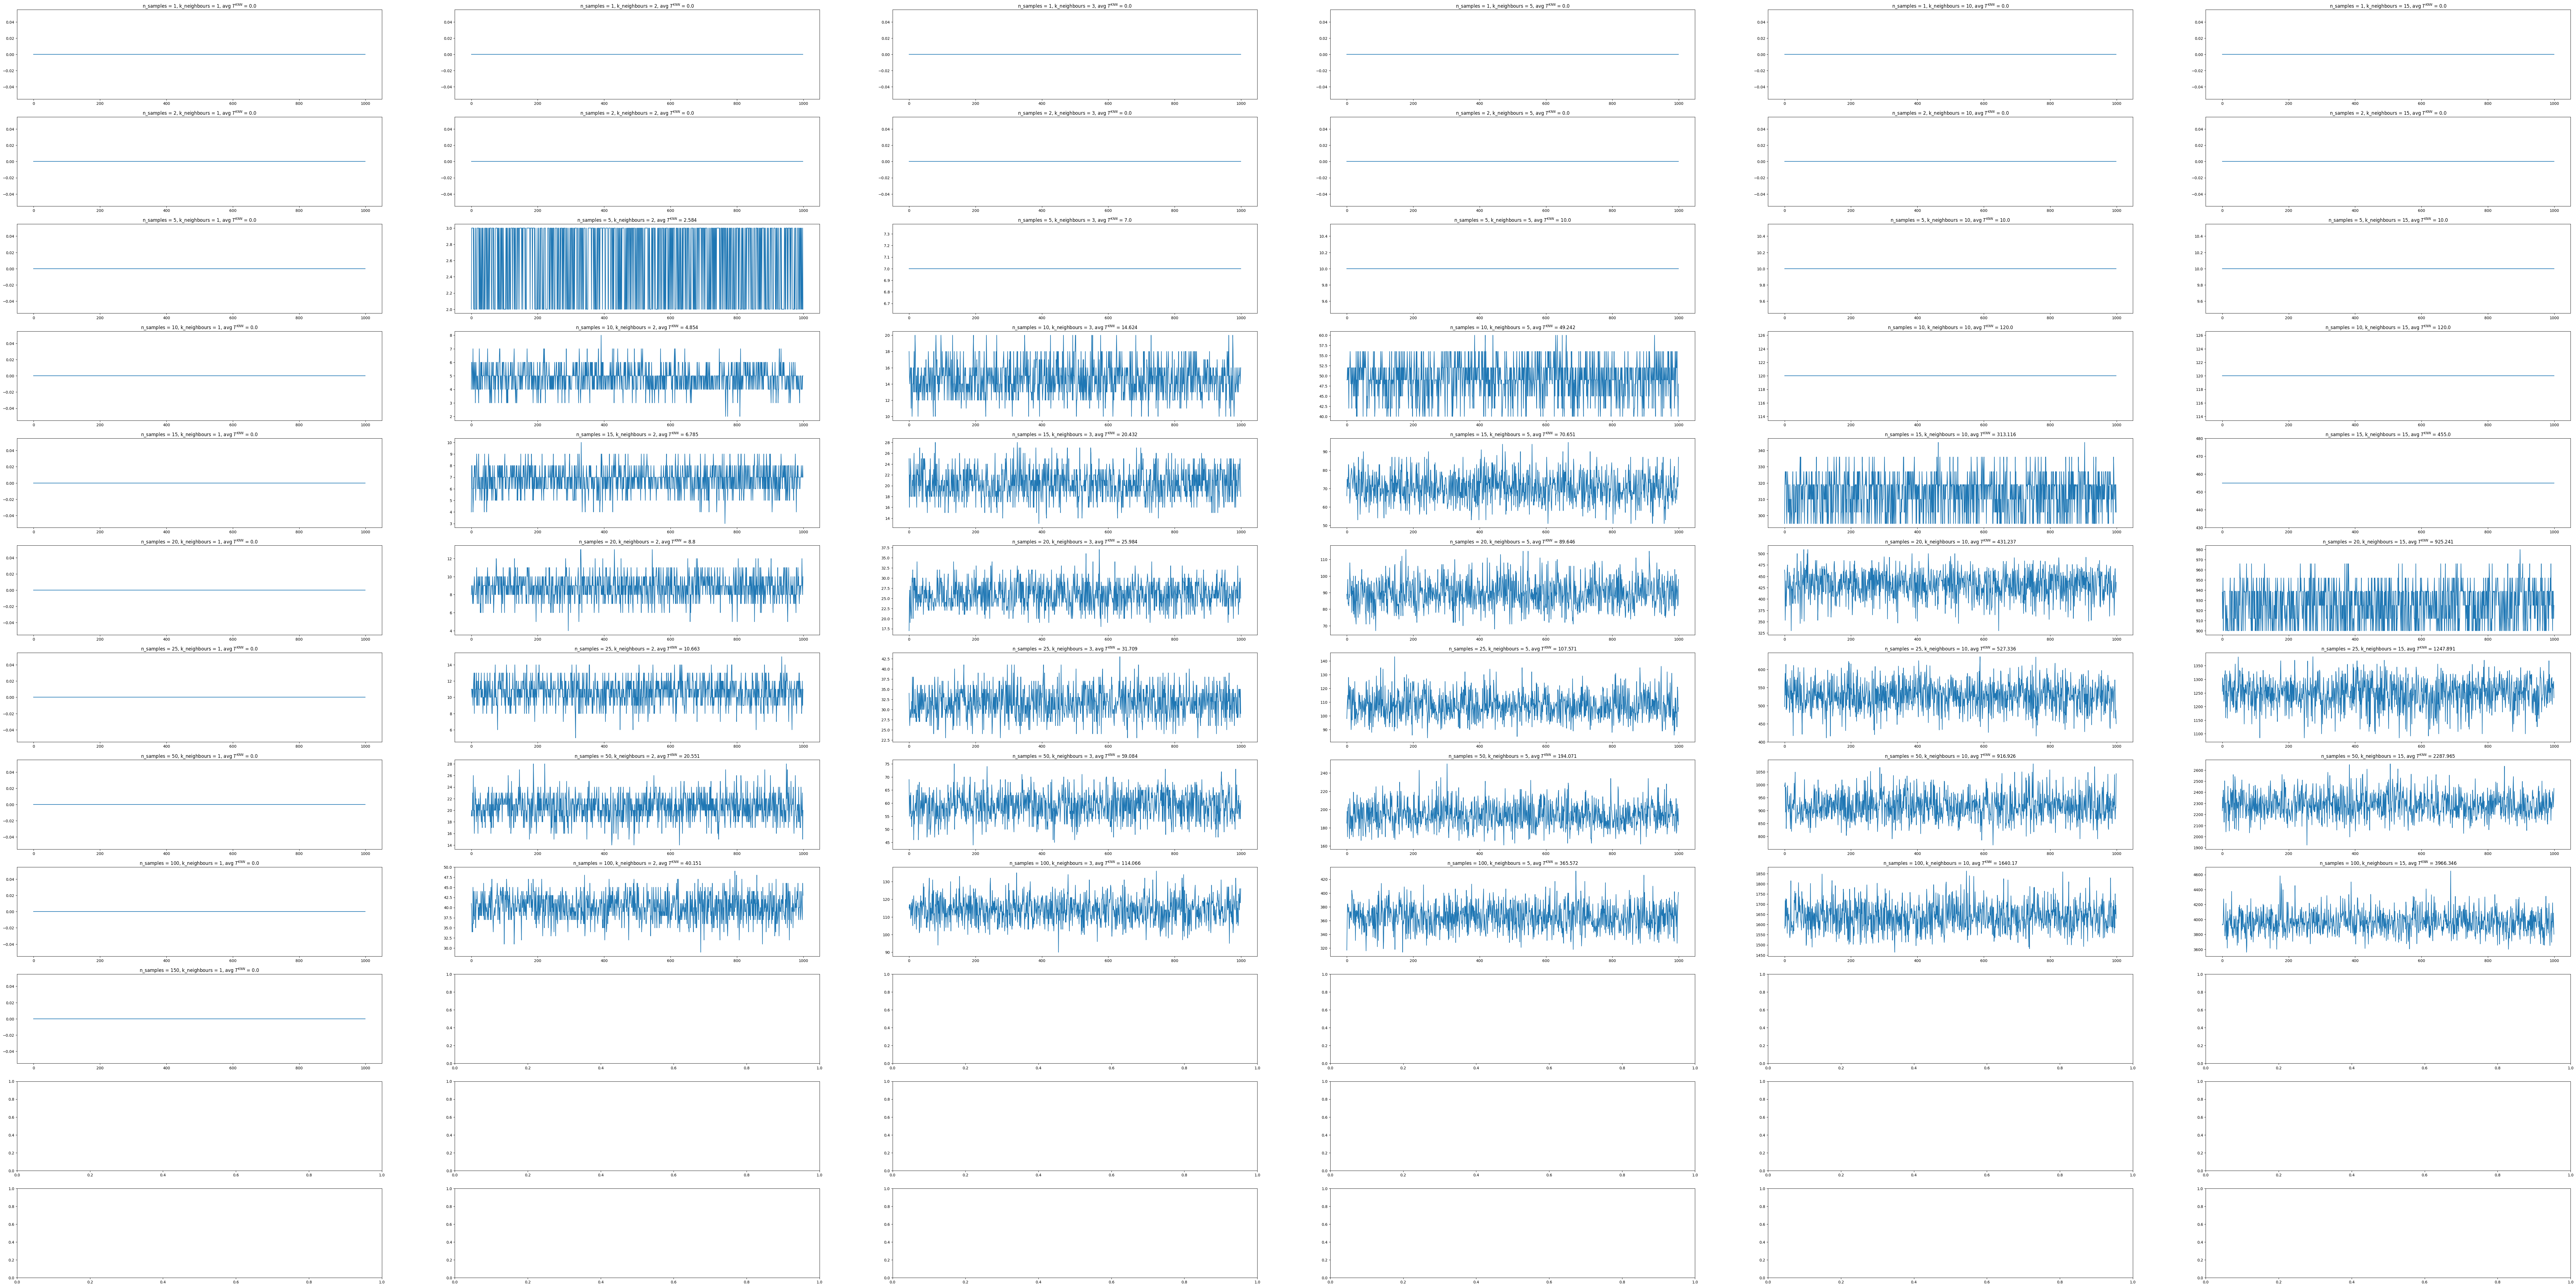

In [3]:
figure, axis = plt.subplots(
    nrows=len(n_samples),
    ncols=len(k_neighbours),
    figsize=(10 * len(n_samples),
             10 * len(k_neighbours))
)

for i, n in enumerate(tqdm(n_samples)):
    for j, k in enumerate(tqdm(k_neighbours)):
        n_triangles = []
        for _ in range(n_iter):
            vertices = np.random.lognormal(0, 1, n)
            knn_graph = build_knn_graph(vertices, k)
            n_triangles.append(calculate_triangles(knn_graph))
        
        axis[i][j].plot(n_triangles)
        axis[i][j].set_title(f"n_samples = {n}, k_neighbours = {k}, avg $T^{{KNN}}$ = {sum(n_triangles) / n_iter}")

plt.show();

#### 2.1.2. Распределение Exp c $\nu = \frac{1}{\sqrt{e^2 - e}}$.

In [ ]:
n_samples = [1, 2, 5, 10, 15, 20, 25, 50, 100, 150, 200, 500]
k_neighbours = [1, 2, 3, 5, 10, 15]
n_iter = 1000

In [ ]:
figure, axis = plt.subplots(
    nrows=len(n_samples),
    ncols=len(k_neighbours),
    figsize=(10 * len(n_samples),
             10 * len(k_neighbours))
)

for i, n in enumerate(tqdm(n_samples)):
    for j, k in enumerate(tqdm(k_neighbours)):
        n_triangles = []
        for _ in range(n_iter):
            vertices = np.random.exponential(1 / np.sqrt(np.e * np.e - np.e), n)
            knn_graph = build_knn_graph(vertices, k)
            n_triangles.append(calculate_triangles(knn_graph))
        
        axis[i][j].plot(n_triangles)
        axis[i][j].set_title(f"n_samples = {n}, k_neighbours = {k}, avg $T^{{KNN}}$ = {sum(n_triangles) / n_iter}")

plt.show();

### 2.2. Исследуем характеристику $\Tau^{dist}$.

#### 2.2.1. Распределение LogNormal с $\mu$ = 0 и $\theta = 1$.

In [ ]:
n_samples = [1, 2, 5, 10, 15, 20, 25, 50, 100, 150, 200, 500]
k_neighbours = [1, 2, 3, 5, 10, 15]
n_iter = 1000

In [ ]:
figure, axis = plt.subplots(
    nrows=len(n_samples),
    ncols=len(k_neighbours),
    figsize=(10 * len(n_samples),
             10 * len(k_neighbours))
)

for i, n in enumerate(tqdm(n_samples)):
    for j, k in enumerate(tqdm(k_neighbours)):
        n_triangles = []
        for _ in range(n_iter):
            vertices = np.random.lognormal(0, 1, n)
            knn_graph = build_knn_graph(vertices, k)
            n_triangles.append(calculate_triangles(knn_graph))
        
        axis[i][j].plot(n_triangles)
        axis[i][j].set_title(f"n_samples = {n}, k_neighbours = {k}, avg $T^{{KNN}}$ = {sum(n_triangles) / n_iter}")

plt.show();

#### 2.2.2. Распределение Exp c $\nu = \frac{1}{\sqrt{e^2 - e}}$.

In [ ]:
n_samples = [1, 2, 5, 10, 15, 20, 25, 50, 100, 150, 200, 500]
k_neighbours = [1, 2, 3, 5, 10, 15]
n_iter = 1000

In [ ]:
figure, axis = plt.subplots(
    nrows=len(n_samples),
    ncols=len(k_neighbours),
    figsize=(10 * len(n_samples),
             10 * len(k_neighbours))
)

for i, n in enumerate(tqdm(n_samples)):
    for j, k in enumerate(tqdm(k_neighbours)):
        n_triangles = []
        for _ in range(n_iter):
            vertices = np.random.exponential(1 / np.sqrt(np.e * np.e - np.e), n)
            knn_graph = build_knn_graph(vertices, k)
            n_triangles.append(calculate_triangles(knn_graph))
        
        axis[i][j].plot(n_triangles)
        axis[i][j].set_title(f"n_samples = {n}, k_neighbours = {k}, avg $T^{{KNN}}$ = {sum(n_triangles) / n_iter}")

plt.show();